In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the data
df = pd.read_csv('/homedata/sbaur/MRV-project/NN_model/UNet/model_performance_log_G6sulfur_2091-2092.csv')

# Parse stringified dictionaries into real dictionaries
df['Pearson_Correlation_6moAvg'] = df['Pearson_Correlation_6moAvg'].apply(ast.literal_eval)
df['RMSE_6moAvg'] = df['RMSE_6moAvg'].apply(ast.literal_eval)
df['RMSE_6moAvg_pct'] = df['RMSE_6moAvg_pct'].apply(ast.literal_eval)

# Define 6-month periods for consistent ordering
periods = ['2091-H1', '2091-H2', '2092-H1', '2092-H2']

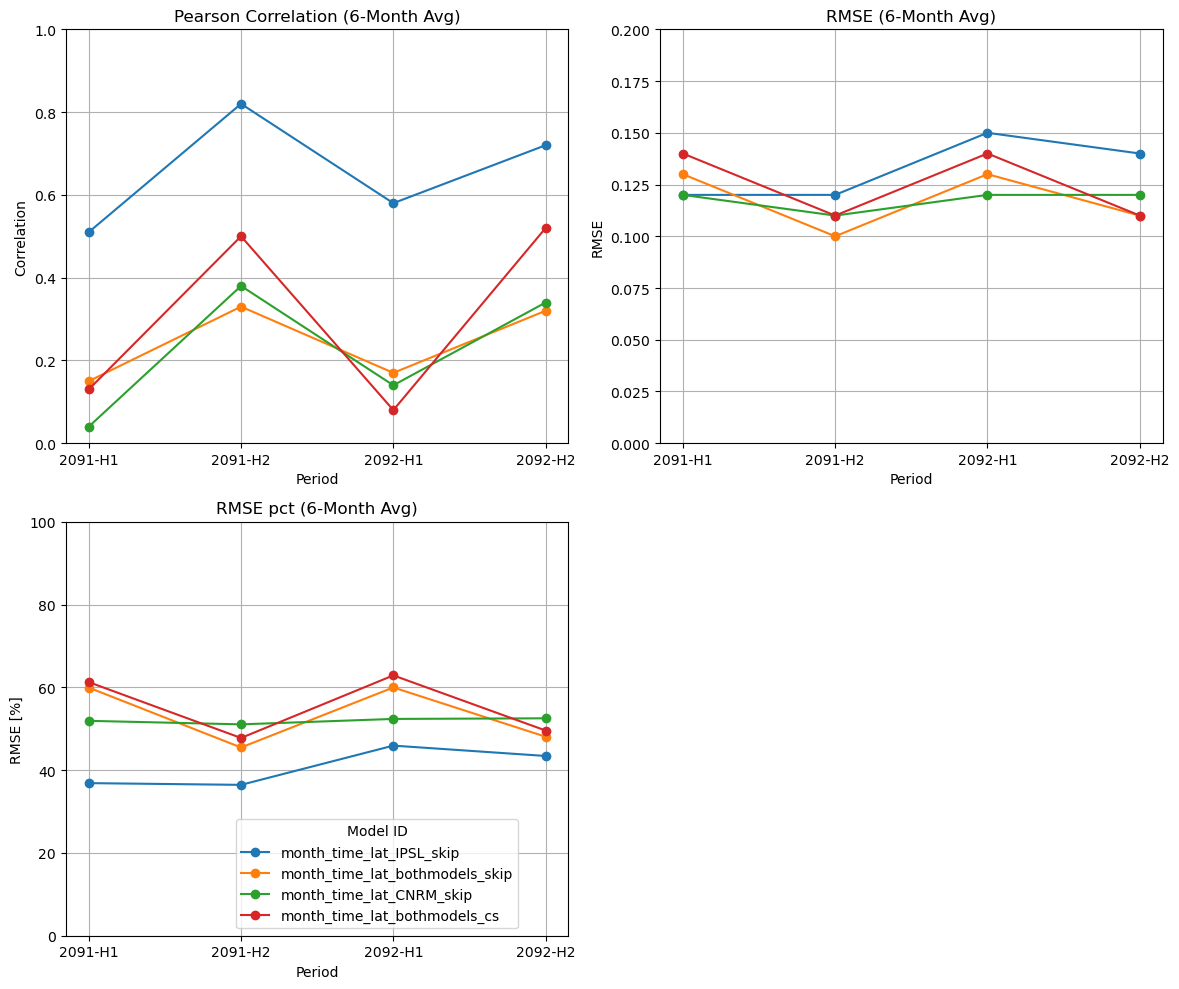

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pearson Correlation
for _, row in df.iterrows():
    model_id = row['ID']
    corr_values = [row['Pearson_Correlation_6moAvg'].get(p, None) for p in periods]
    abs_corr_values = [abs(x) for x in corr_values]
    axes[0,0].plot(periods, abs_corr_values, marker='o', label=model_id)

axes[0,0].set_title('Pearson Correlation (6-Month Avg)')
axes[0,0].set_ylabel('Correlation')
axes[0,0].set_xlabel('Period')
axes[0,0].grid(True)
axes[0,0].set_ylim(0,1)

# RMSE
for _, row in df.iterrows():
    model_id = row['ID']
    rmse_values = [row['RMSE_6moAvg'].get(p, None) for p in periods]
    axes[0,1].plot(periods, rmse_values, marker='o', label=model_id)

axes[0,1].set_title('RMSE (6-Month Avg)')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_xlabel('Period')
axes[0,1].grid(True)
axes[0,1].set_ylim(0,0.2)



# RMSE pct
for _, row in df.iterrows():
    model_id = row['ID']
    rmse_values = [row['RMSE_6moAvg_pct'].get(p, None) for p in periods]
    axes[1,0].plot(periods, rmse_values, marker='o', label=model_id)

axes[1,0].set_title('RMSE pct (6-Month Avg)')
axes[1,0].set_ylabel('RMSE [%]')
axes[1,0].set_xlabel('Period')
axes[1,0].grid(True)
axes[1,0].set_ylim(0,100)

axes[1,0].legend(title='Model ID', loc='center right', bbox_to_anchor=(0.9, 0.15), borderaxespad=0.)

axes[1,1].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the legend
plt.show()

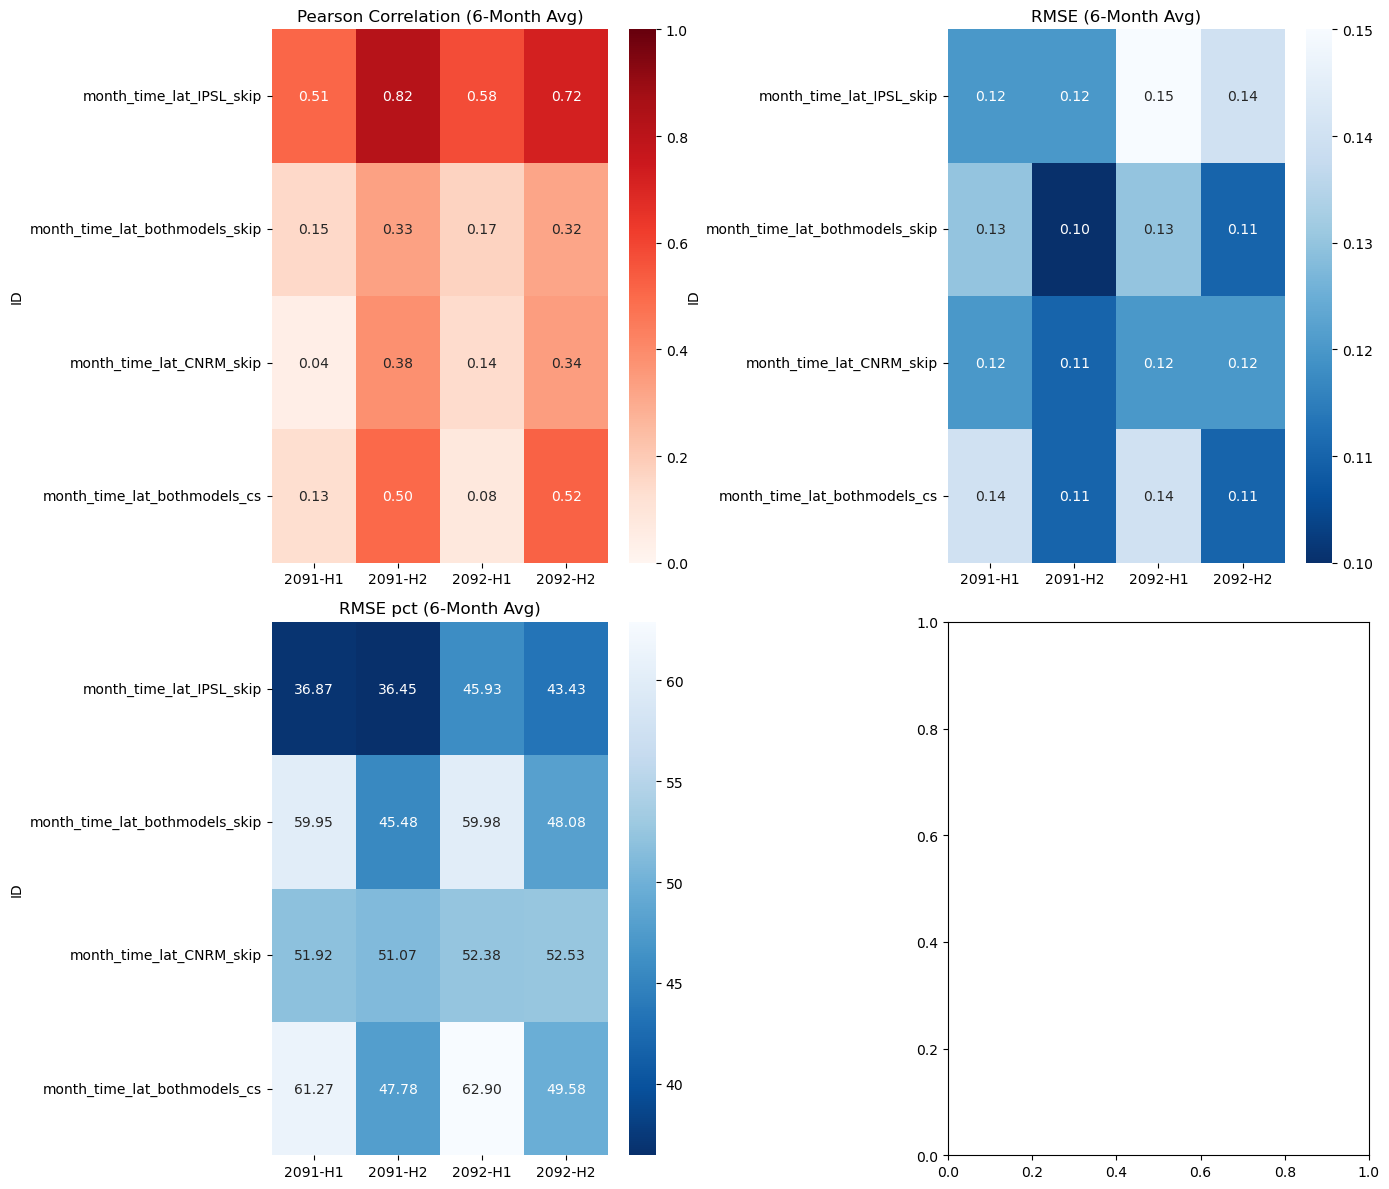

In [19]:
#### # empty DataFrames for heatmaps
corr_matrix = pd.DataFrame(index=df['ID'], columns=periods)
rmse_matrix = pd.DataFrame(index=df['ID'], columns=periods)
rmse_pct_matrix = pd.DataFrame(index=df['ID'], columns=periods)


# Fill the matrices
for _, row in df.iterrows():
    model_id = row['ID']
    for period in periods:
        corr_matrix.loc[model_id, period] = row['Pearson_Correlation_6moAvg'].get(period, None)
        rmse_matrix.loc[model_id, period] = row['RMSE_6moAvg'].get(period, None)
        rmse_pct_matrix.loc[model_id, period] = row['RMSE_6moAvg_pct'].get(period, None)
        

# Convert values to float
corr_matrix = corr_matrix.astype(float).abs()
rmse_matrix = rmse_matrix.astype(float)
rmse_pct_matrix = rmse_pct_matrix.astype(float)

# Plot heatmaps
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.color_palette("Reds", as_cmap=True), vmin=0, vmax=1, ax=axes[0,0])
axes[0,0].set_title("Pearson Correlation (6-Month Avg)")

sns.heatmap(rmse_matrix, annot=True, fmt=".2f", cmap=sns.color_palette("Blues_r", as_cmap=True), ax=axes[0,1])
axes[0,1].set_title("RMSE (6-Month Avg)")

sns.heatmap(rmse_pct_matrix, annot=True, fmt=".2f", cmap=sns.color_palette("Blues_r", as_cmap=True), ax=axes[1,0])
axes[1,0].set_title("RMSE pct (6-Month Avg)")

plt.tight_layout()
plt.show()

In [7]:
corr_matrix

,1991-H1,1991-H2,1992-H1,1992-H2
ID,,,,
lonmonth_max,0.46,0.54,0.04,-0.10
lonmonth_smooth_nomask,0.58,0.56,-0.13,0.02
lonmonth_smooth_IPSL,0.53,0.32,-0.11,0.08
lon,0.62,0.25,0.14,0.06
lonmonth_smooth,0.45,0.54,0.09,0.18
lonmonth_max_smooth,0.12,0.66,0.11,-0.14


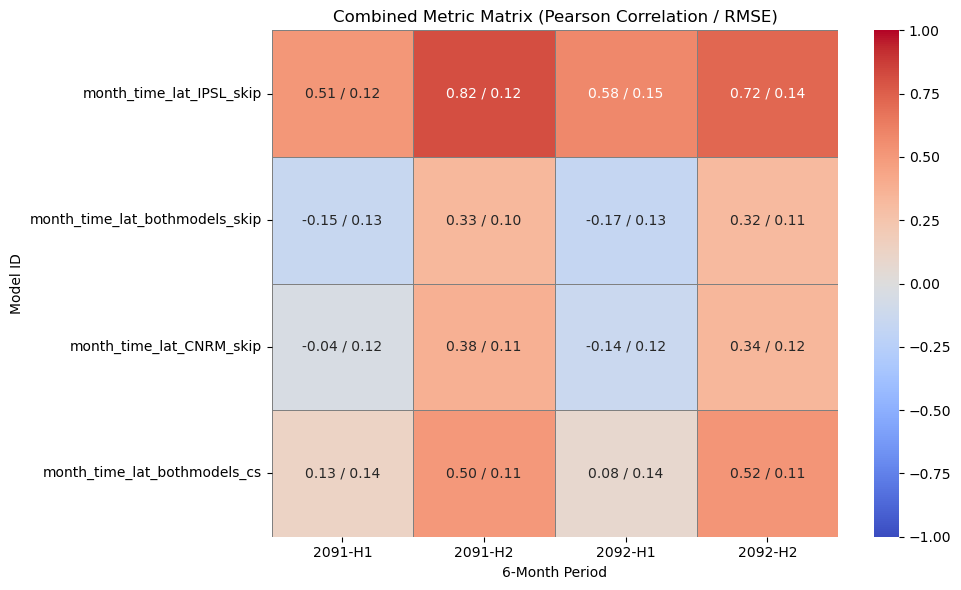

In [14]:
# Initialize matrices
corr_matrix = pd.DataFrame(index=df['ID'], columns=periods)
rmse_matrix = pd.DataFrame(index=df['ID'], columns=periods)
annot_matrix = pd.DataFrame(index=df['ID'], columns=periods)

# Fill matrices
for _, row in df.iterrows():
    model_id = row['ID']
    for period in periods:
        corr = row['Pearson_Correlation_6moAvg'].get(period, float('nan'))
        rmse = row['RMSE_6moAvg'].get(period, float('nan'))
        corr_matrix.loc[model_id, period] = corr
        rmse_matrix.loc[model_id, period] = rmse
        # Combined annotation: "corr / rmse"
        annot_matrix.loc[model_id, period] = f"{corr:.2f} / {rmse:.2f}"

# Convert to float for heatmap
corr_matrix = corr_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Combined Metric Matrix (Pearson Correlation / RMSE)")
plt.ylabel("Model ID")
plt.xlabel("6-Month Period")
plt.tight_layout()
plt.show()